### Code to test sequential estimation for sum of sigmoid model with two data points

In [1]:

#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import scipy.stats as st
import scipy.optimize as sopt
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid


##### Sequential Estimation

data points are [0.56083467] [0.83633254]


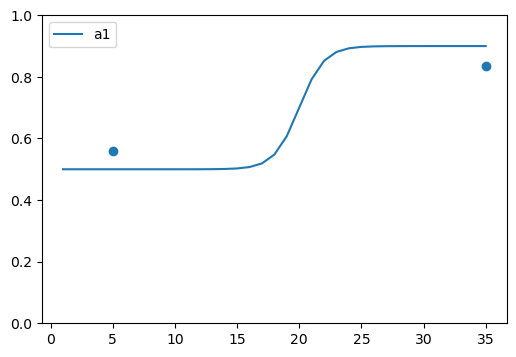

In [74]:

sigma = 0.1


a0 = 0.5
a1 = 0.4

T1 = 20
t0 = 5
t1 = 35

t= np.linspace(1,35, 35)

beta_model = a0 + a1/(1 + np.exp((T1-t)))

beta_d0 = a0  + a1/(1 + np.exp((T1-t0)))

beta_d1 = a0 + a1/(1 + np.exp((T1-t1)))


np.random.seed(74)

e1 = np.random.normal(0, sigma,1)

d0 = beta_d0 + e1

e2 = np.random.normal(0, sigma,1)

d1 = beta_d1 + e2


print("data points are", d0, d1)

nsmp = 1000
param0 = np.zeros((nsmp,1))
param1 = np.zeros((nsmp,1))

for i in range(nsmp):
        
    param0[i] = d0 + sigma * np.random.randn(1)

    param1[i] = (d1 - param0[i]) * np.exp((T1-t1)) + sigma * np.random.randn(1)



plt.figure(1,figsize=(6,4))
plt.plot(t, beta_model,label='a1')
plt.scatter([t0,t1], [d0,d1])
plt.ylim(0,1)
plt.legend()

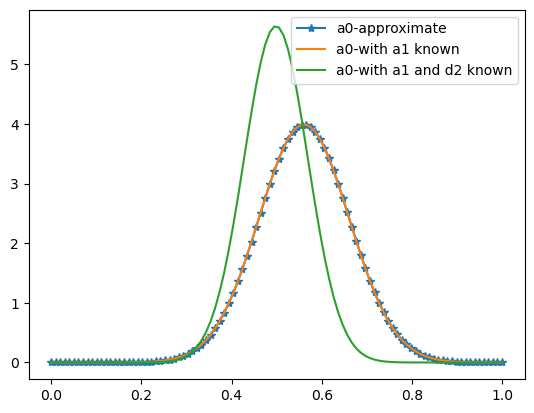

In [76]:


### Analytical PDF
a0_analytical = np.linspace(0.0,1.0, 100)
multiplier = (1/(np.sqrt(2*np.pi)*sigma)) 
pdf_a0 = (multiplier) * np.exp(-1 * ((a0_analytical-d0)**2)/(2*sigma**2))
plt.figure(100)
plt.plot(a0_analytical, pdf_a0, '-*',label='a0-approximate')
# h = np.histogram(param0,100)
# plt.hist(h)


### Exact PDF for the case with a2 known
multiplier = (1/(np.sqrt(2*np.pi)*sigma)) 
pdf_a0_a1known = (multiplier) * np.exp(-1 * ((a0_analytical - (d0- a1/(1 + np.exp(T1-t0))))**2)/(2*sigma**2))
plt.plot(a0_analytical, pdf_a0_a1known, label='a0-with a1 known')
plt.legend()



d_mean = (d0+d1) * 0.5

a1_mean = 0.5 * ( a1/(1 + np.exp((T1-t0))) + a1/(1 + np.exp((T1-t1))))



### Exact PDF for the case with a2 and d2 known
multiplier = (1/(np.sqrt(np.pi*sigma**2))) 
pdf_a0_a1_d1_known = (multiplier) * np.exp(-1 * ((a0_analytical - (d_mean - a1_mean ))**2)/(sigma**2))
plt.plot(a0_analytical, pdf_a0_a1_d1_known, label='a0-with a1 and d2 known')
plt.legend()







